##Introduction to neural network classfication with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A Classification is where you try to classify something as one thing or another.
A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification


##Creating data to view and fit


In [ ]:
from sklearn.datasets import make_circles
# Make 1000 examples
n_samples=1000

# Create circles
X,y= make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check out labels
y[:10]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now.... let's visualize it

In [ ]:
import pandas as pd
circles= pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


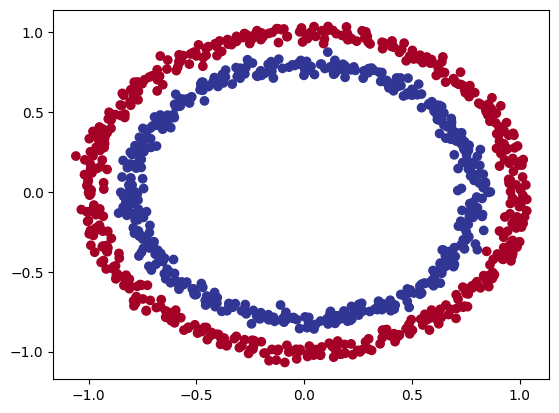

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

##Input and Output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

The steps in modelling with Tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...


In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3.Fit the model
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=5)


Epoch 1/5
32/32 [==============================] - 2s 4ms/step - loss: 2.2081 - accuracy: 0.4970
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7401 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.5005
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.4994
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.4973


In [ ]:
# Let's try and improve our model
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934650540351868, 0.5]

Since we're working on a binary classification problem and our model is getting around  50% accuracy ....it's perfoming as it is guessing
So let's step things up a notch and add a extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
     tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3.Fit the model
model_2.fit(tf.expand_dims(X,axis=-1),y,epochs=5,verbose=0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000


[0.6945456266403198, 0.5]

In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model
1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD
3. Fitting a model- perhaps we might fit our model for more epochs(leave it training for longer)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),#add 100 Dense neurons
     tf.keras.layers.Dense(10),#add another layer with 10 neurons
     tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3.Fit the model
model_3.fit(tf.expand_dims(X,axis=-1),y,epochs=100,verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000


[0.6937682628631592, 0.5]

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2, 1)              2         
                                                                 
 dense_2 (Dense)             (None, 2, 1)              2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.predict(tf.expand_dims(X,axis=-1))

32/32 [==============================] - 0s 1ms/step


array([[[0.5112508 ],
        [0.51549023]],

       [[0.5234997 ],
        [0.5161246 ]],

       [[0.52398014],
        [0.51596224]],

       ...,

       [[0.51847774],
        [0.5239364 ]],

       [[0.51193106],
        [0.52359176]],

       [[0.5150882 ],
        [0.50955105]]], dtype=float32)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
# y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                        np.linspace(y_min, y_max, 100))
# x_in = np.c_[xx.ravel(), yy.ravel()]
# # xx,yy,x_in
# y_pred = model_3.predict(x_in)
# print(y_pred)
# model_3.output_shape[-1]
# # y_pred = np.round(y_pred)
# # l=[]
# # print(type(y_pred))
# # for i in y_pred:
# #   l.append([i[0][0],i[1][0]])
# # y_pred=np.array(l).reshape(xx.shape)
# # print(y_pred)
# # plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
# # plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
# # plt.xlim(xx.min(), xx.max())
# # plt.ylim(yy.min(), yy.max())

# np.max(y_pred, axis=1).shape
# cnt=0
# for i in np.min(y_pred, axis=1):
#   if i[0]<0.5:
#     cnt+=1
# print(cnt)
# # print(X)

To Visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features(X) and label(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


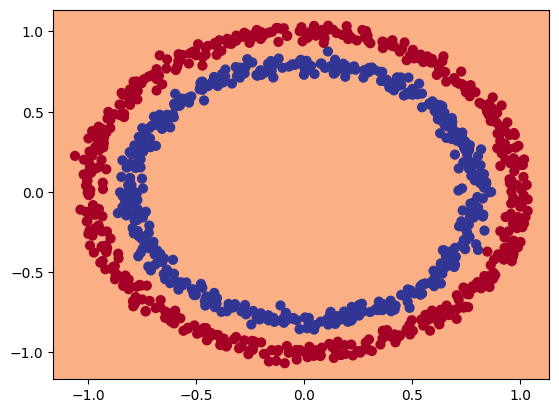

In [ ]:
# Check out the predictions our model is makin
plot_decision_boundary(model_3,X,y)

In [ ]:
# these are our boundaries
x_min, x_max=X[:,0].min()-0.1, X[:,0].max()+0.1
y_min, y_max=X[:,1].min()-0.1, X[:,1].max()+0.1

In [ ]:
x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [ ]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression= tf.range(0,1000,5)
y_regression=tf.range(100,1100,5) # y=X+100

# Split our regression data into training and test sets
X_reg_train= X_regression[:150]
X_reg_test= X_regression[150:]
y_reg_train= y_regression[:150]
y_reg_test= y_regression[150:]


# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: -3839.1462 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

### Oh wait ... we compiled our model for a binary classifier problem.
### But.....we're now working on a regression problem, let's change the model to suit our data.

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1.Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3.Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 286.8837 - mae: 286.8837
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 188.5284 - mae: 188.5284
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 91.6434 - mae: 91.6434
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 50.7627 - mae: 50.7627
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.3741 - mae: 71.3742
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 57.9385 - mae: 57.9385
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 42.4105 - mae: 42.4105
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 47.6348 - mae: 47.6348
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 41.6445 - mae: 41.6445
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 44.0189 - mae: 44.0189
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 4ms/step


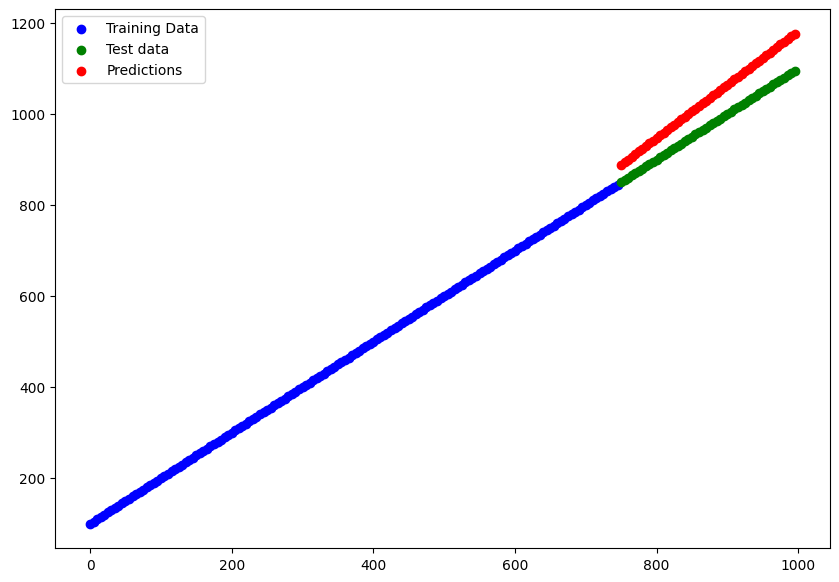

In [ ]:
# Make predictions with our trained model
y_reg_preds=model_3.predict(X_reg_test)

# Plot the model's
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train,c="b",label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds,c="r", label="Predictions")
plt.legend();



## The missing Piece :Non-linearity

In [ ]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
                )

history=model_4.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.6651 - accuracy: 0.4956
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5919 - accuracy: 0.4983
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5676 - accuracy: 0.4984
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5372 - accuracy: 0.4997
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5137 - accuracy: 0.4998
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4942 - accuracy: 0.4980
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4404 - accuracy: 0.4993
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4323 - accuracy: 0.4982
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3720 - accuracy: 0.5003
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2673 - accuracy: 0.5010
Epoch 11/

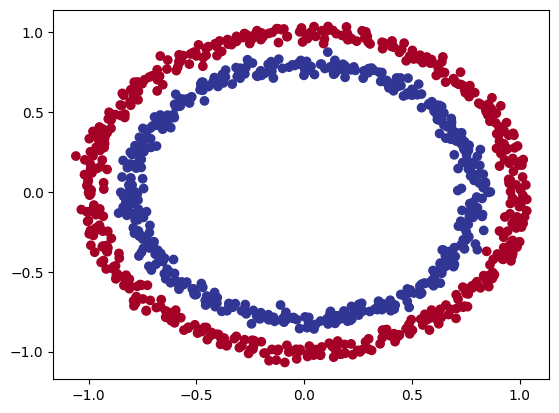

In [ ]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


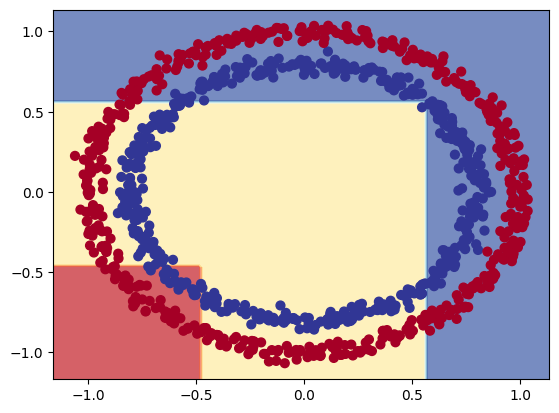

In [ ]:
# Check the decsion boundary for out latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

### Let's try build our first network with a non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1.Create a model with a non-Linear activation
model_5= tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
# 2.Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3.Fit the model
history=model_5.fit(X,y,epochs=100)




Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.5188 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5065 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5041 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5033 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5027 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5020 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5017 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5006 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5000 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4993 - accuracy: 0.4880
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neural network from Tensorflow playgroud

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# 2.Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history=model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7053 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4330
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4580
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4400
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4620
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4470
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4780
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X,y)


32/32 [==============================] - 0s 5ms/step - loss: 0.5036 - accuracy: 0.8180


[0.5036368370056152, 0.8180000185966492]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


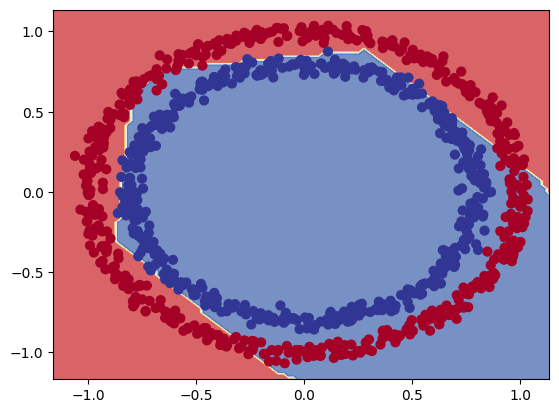

In [ ]:
# how do our model predictions look?
plot_decision_boundary(model_6,X,y)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1.Create a model
model_7 =tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),

    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 metrics=['accuracy'])

#  3.Fit the model
history=model_7.fit(X,y,epochs=150)

Epoch 1/150
32/32 [==============================] - 2s 4ms/step - loss: 0.6998 - accuracy: 0.4950
Epoch 2/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.4980
Epoch 3/150
32/32 [==============================] - 0s 5ms/step - loss: 0.6969 - accuracy: 0.4620
Epoch 4/150
32/32 [==============================] - 0s 6ms/step - loss: 0.6962 - accuracy: 0.4300
Epoch 5/150
32/32 [==============================] - 0s 6ms/step - loss: 0.6956 - accuracy: 0.4500
Epoch 6/150
32/32 [==============================] - 0s 9ms/step - loss: 0.6952 - accuracy: 0.4590
Epoch 7/150
32/32 [==============================] - 0s 7ms/step - loss: 0.6947 - accuracy: 0.4500
Epoch 8/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4770
Epoch 9/150
32/32 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.4670
Epoch 10/150
32/32 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.4550
Epoch 11/

In [ ]:
# 4.Evaluate our model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9970


[0.18486090004444122, 0.996999979019165]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


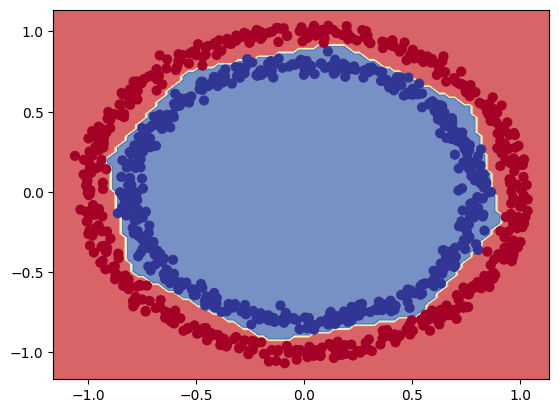

In [ ]:
# how do our model predictions look?
plot_decision_boundary(model_7,X,y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

> 🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

> 🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [ ]:
# Create a toy a tesor (similar to the data we pass into our models)
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

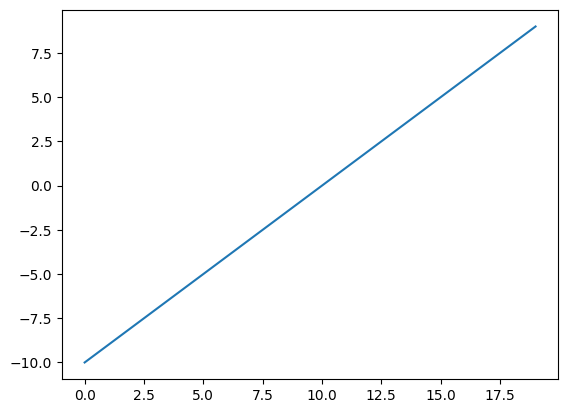

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x)=1/(1+esp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

#USE the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

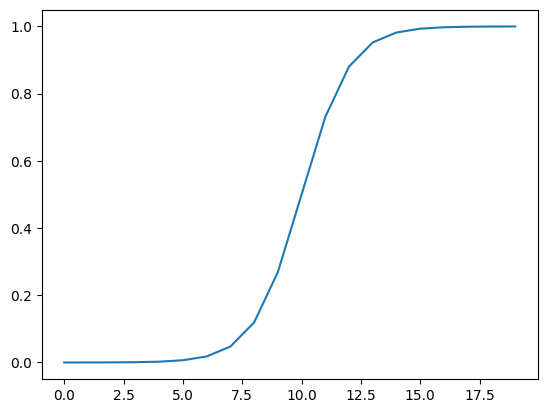

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's start by replicating relu

def relu(x):
  return tf.maximum(0,x)

#USE the relu function on our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

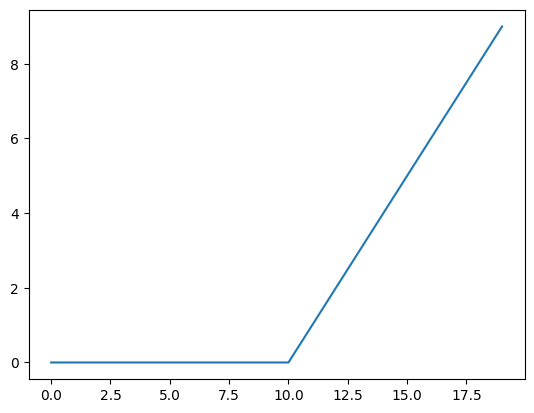

In [ ]:
# Plot our toy tensor transformed by relu
plt.plot(relu(A))

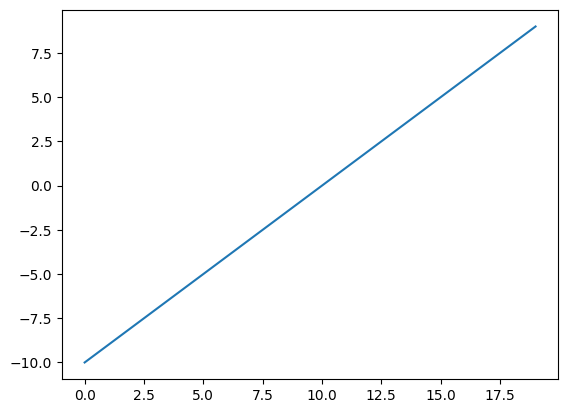

In [ ]:
# Let's try the linar activation function change anything
plt.plot(tf.keras.activations.linear(A))

###Evaluating and improving our classification

So far we've been training and testing on the same dataset..
However, in machine learning this is bascially a sin
So let's create a training and test set


In [ ]:
len(X)

1000

In [ ]:
# Split into train and test sets
X_train,y_train=X[:800 ], y[:800]
X_test,y_test=X[800:],y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
X
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(3, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.015), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5025
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5088
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5025
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.5113
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5213
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5263
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.5288
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.5337
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.5375
Epoch 11/

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8900


[0.4139863848686218, 0.8899999856948853]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


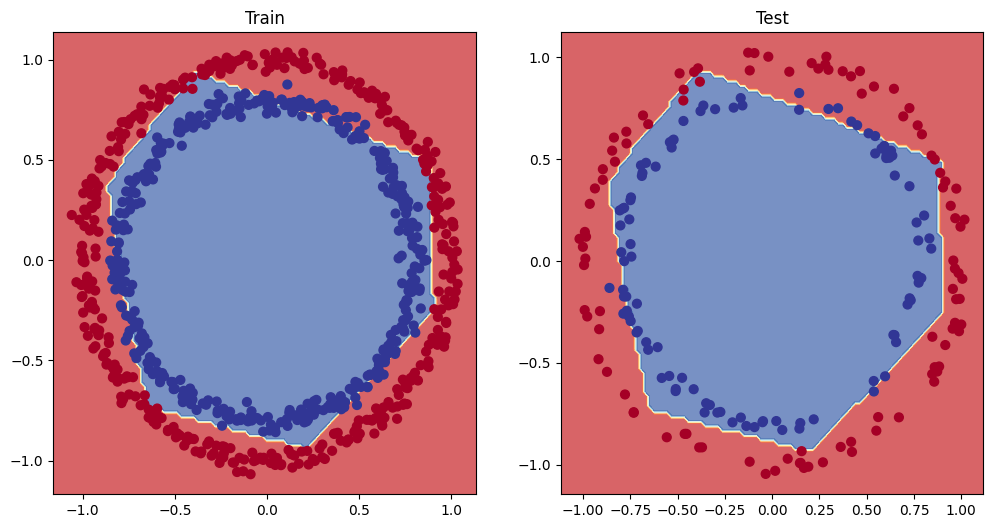

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [ ]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4)                 12        
                                                                 
 dense_18 (Dense)            (None, 3)                 15        
                                                                 
 dense_19 (Dense)            (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history.history

{'loss': [0.6953797340393066,
  0.6888131499290466,
  0.6848616003990173,
  0.6823264956474304,
  0.6806236505508423,
  0.6791836619377136,
  0.6777710914611816,
  0.6767382025718689,
  0.6753999590873718,
  0.6742019057273865,
  0.6730220913887024,
  0.6719302535057068,
  0.6706818342208862,
  0.6694918274879456,
  0.6684242486953735,
  0.66703200340271,
  0.6660144925117493,
  0.664603054523468,
  0.6636485457420349,
  0.6622801423072815,
  0.6609705090522766,
  0.6595273017883301,
  0.6583161950111389,
  0.656863272190094,
  0.6554527878761292,
  0.6540786623954773,
  0.6526159048080444,
  0.6508649587631226,
  0.649466335773468,
  0.647785484790802,
  0.6462266445159912,
  0.6444931030273438,
  0.642741858959198,
  0.6409528851509094,
  0.6393685340881348,
  0.6371729373931885,
  0.6354483962059021,
  0.6338996887207031,
  0.6317684054374695,
  0.6300663948059082,
  0.6280217170715332,
  0.625876784324646,
  0.624092698097229,
  0.6216940879821777,
  0.6198577284812927,
  0.6177595

#Plotting the loss (or training) curves

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.695380,0.50000
1,0.688813,0.50250
2,0.684862,0.50875
3,0.682326,0.50250
4,0.680624,0.51125
...,...,...
95,0.437950,0.87875
96,0.434507,0.88375
97,0.429300,0.89125
98,0.424965,0.89750


Text(0.5, 1.0, 'Model_8 loss curves')

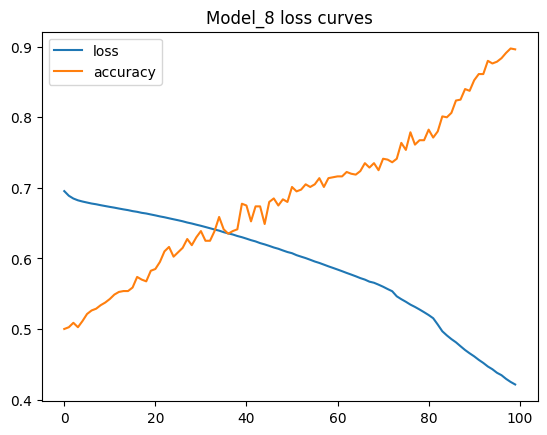

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

Beautiful. This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

> 🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

### Finding the best learning rate

Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.

In `model_8` you saw we lowered the Adam optimizer's learning rate from the default of `0.001` (default) to `0.01`.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

> 🔑 **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                         callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.5225 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5188 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5175 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5175 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5163 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5213 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5188 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5163 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

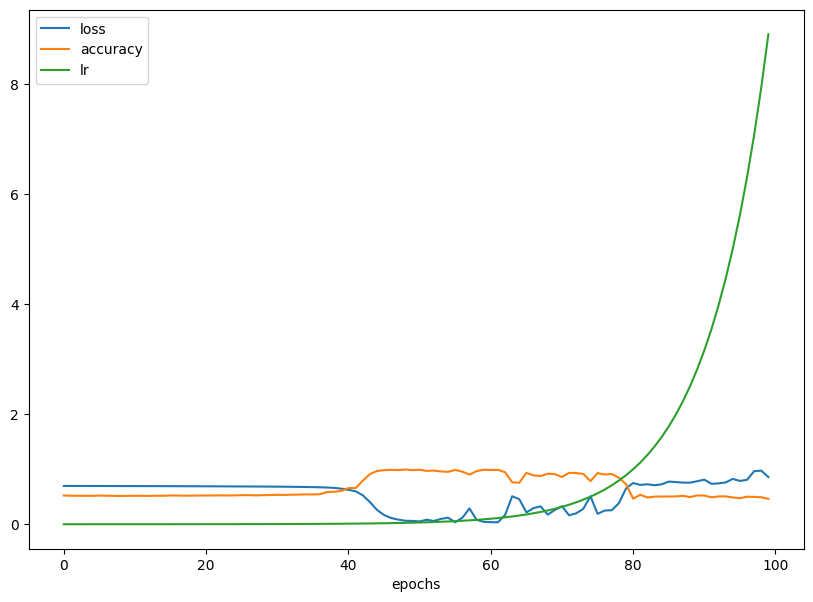

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs')

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

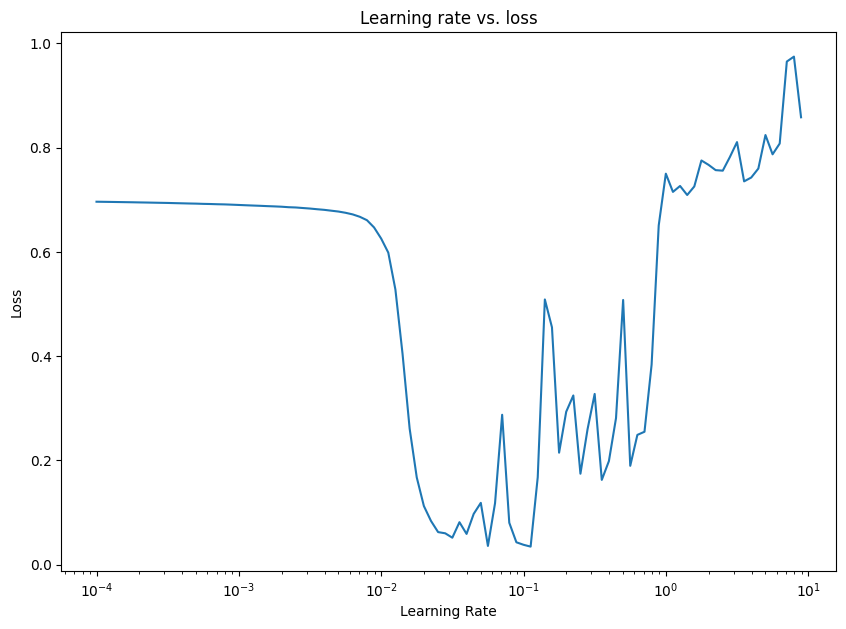

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# Now we've estimated the ideal learning rate (we'll use `0.02`) for our model, let's refit it.
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(3, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=350)

Epoch 1/350
25/25 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5013
Epoch 2/350
25/25 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5113
Epoch 3/350
25/25 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.5038
Epoch 4/350
25/25 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.5063
Epoch 5/350
25/25 [==============================] - 0s 10ms/step - loss: 0.6888 - accuracy: 0.5063
Epoch 6/350
25/25 [==============================] - 0s 6ms/step - loss: 0.6882 - accuracy: 0.5088
Epoch 7/350
25/25 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.5075
Epoch 8/350
25/25 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5138
Epoch 9/350
25/25 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5150
Epoch 10/350
25/25 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5150
Epoch 11

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


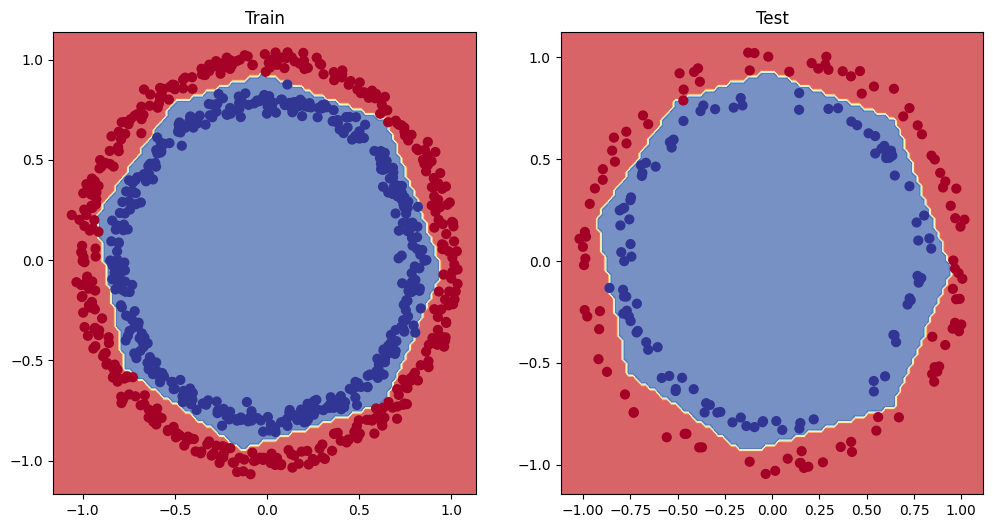

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9900
Model loss on test set: 0.027841128408908844
Model accuracy on test set: 99.00%


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix\
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
# View the first 10 predictions
y_preds[:10]

array([[0.989494  ],
       [0.99859387],
       [0.99862725],
       [0.99714684],
       [0.00813568],
       [0.03109838],
       [0.979635  ],
       [0.00137485],
       [0.9796301 ],
       [0.00323209]], dtype=float32)

In [ ]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  1,  98]])

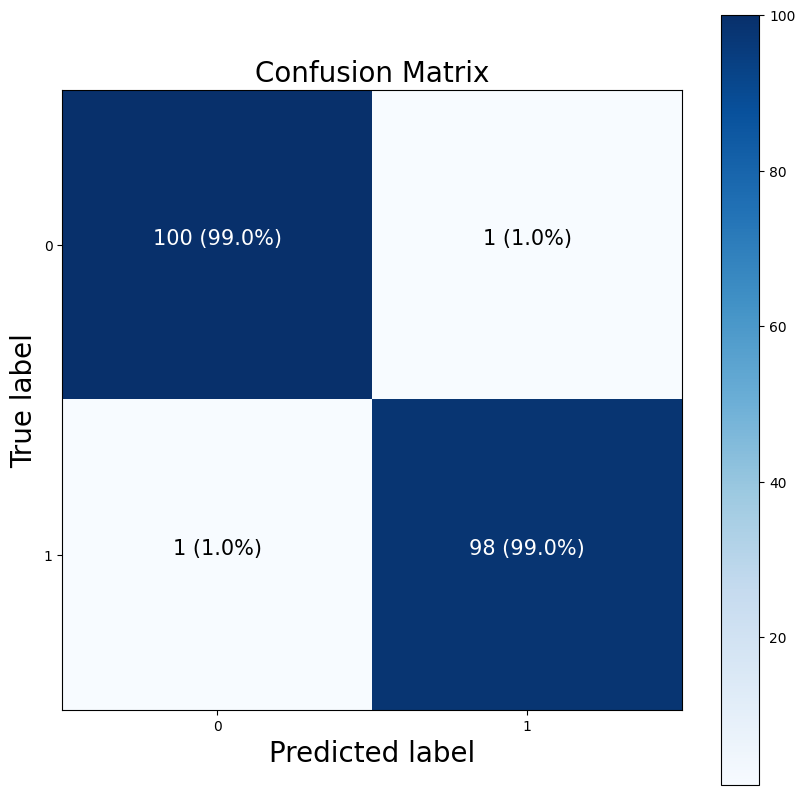

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


# Working with a large example(Multiclass classification)

When you have 3 or more different classes


Here we will use fashion mnist dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data is already been sorted into training and test
(train_data, train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")


Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

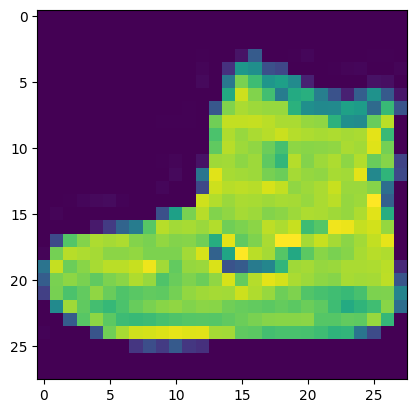

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
# Check the labels
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'Coat')

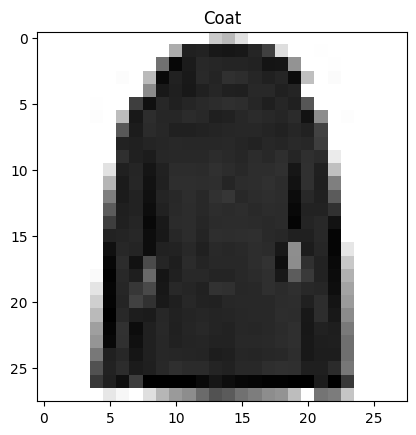

In [ ]:
# Plot an example image and its label
index_of_choice=2000
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

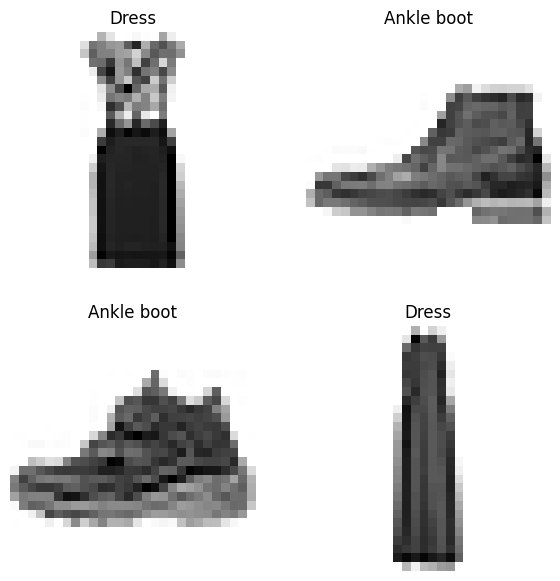

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1) #(row,column,image no.)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

You ready? Let's go.

In [ ]:
# Our data needs to be flatten from 28*28 to 784
flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28*28

784

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
# Categorical cross entropy will only work with one hot encoded data values
# for integer values use SPARSE CATEGORICAL CROSS ENTROPY

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#tweeks
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)#tweek
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history=model_11.fit(train_data,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data,test_labels))#tweek

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3992 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3035 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(),train_data.max()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the maximum: `255.0` (dividing by a float also converts to a float).


Doing so will result in all of our data being between 0 and 1 (known as **scaling** or **normalization**).

In [ ]:
train_data=train_data/255.0
test_data=test_data/255.0

train_data.min(), train_data.max()

(0.0, 0.00392156862745098)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")

])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history=model_12.fit(train_data,train_labels,
                          epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2421 - accuracy: 0.5154 - val_loss: 1.0004 - val_accuracy: 0.5951
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9377 - accuracy: 0.6177 - val_loss: 0.9224 - val_accuracy: 0.6161
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8784 - accuracy: 0.6349 - val_loss: 0.8831 - val_accuracy: 0.6376
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8373 - accuracy: 0.6657 - val_loss: 0.8401 - val_accuracy: 0.6861
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7582 - accuracy: 0.7283 - val_loss: 0.7696 - val_accuracy: 0.7359
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7121 - accuracy: 0.7484 - val_loss: 0.7824 - val_accuracy: 0.7235
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6908 - accuracy: 0.7553 - val_loss: 0.7477 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

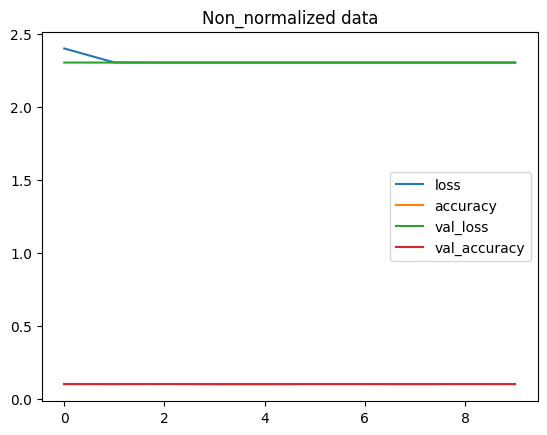

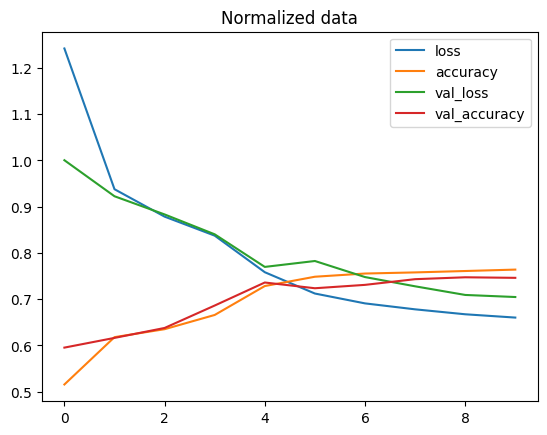

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non_normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

*NOTE*:
The same model with even *slightly* different data can produce dramatically different results. So when you're  comparing models, It's important to make sure you're comparing them on the same criteria (e.g same architecture but different data or same data but different architecture)

#Finding out best Learning Rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9968 - accuracy: 0.2033 - val_loss: 1.7916 - val_accuracy: 0.2396 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6913 - accuracy: 0.2784 - val_loss: 1.6179 - val_accuracy: 0.2970 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5624 - accuracy: 0.3042 - val_loss: 1.5239 - val_accuracy: 0.3137 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4904 - accuracy: 0.3285 - val_loss: 1.4683 - val_accuracy: 0.3418 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4463 - accuracy: 0.3616 - val_loss: 1.4314 - val_accuracy: 0.3660 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4162 - accuracy: 0.3785 - val_loss: 1.4074 - val_accuracy: 0.3730 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

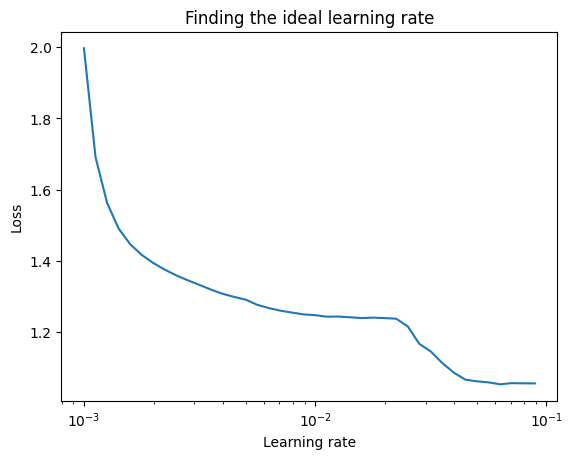

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6974 - accuracy: 0.3529 - val_loss: 1.1951 - val_accuracy: 0.5482
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0409 - accuracy: 0.6133 - val_loss: 0.9560 - val_accuracy: 0.6429
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9044 - accuracy: 0.6638 - val_loss: 0.8753 - val_accuracy: 0.6669
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8474 - accuracy: 0.6848 - val_loss: 0.8357 - val_accuracy: 0.6928
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8134 - accuracy: 0.6970 - val_loss: 0.8077 - val_accuracy: 0.7053
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7898 - accuracy: 0.7071 - val_loss: 0.7901 - val_accuracy: 0.7121
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7710 - accuracy: 0.7151 - val_loss: 0.7720 - val_accuracy:

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.3605713e-10, 5.4516575e-13, 1.6535805e-07, 6.0332331e-07,
        1.5288600e-05, 1.8138219e-01, 2.4648477e-07, 2.1148986e-01,
        9.9175016e-04, 6.0611987e-01],
       [2.0938737e-03, 7.5698276e-12, 5.9747750e-01, 9.2840410e-06,
        1.5700004e-01, 2.3234734e-13, 2.3680437e-01, 8.9608279e-37,
        6.6149207e-03, 2.6890687e-24],
       [6.5494249e-05, 9.9888051e-01, 2.6753661e-08, 1.0536851e-03,
        4.6797921e-09, 4.0335552e-13, 2.0360848e-07, 1.2141335e-18,
        1.4381245e-15, 1.3418833e-27],
       [5.9483387e-05, 9.9622780e-01, 6.0022252e-08, 3.7121056e-03,
        2.5754511e-08, 2.6118629e-10, 4.6590918e-07, 3.2231365e-13,
        6.4283587e-14, 1.2237698e-22],
       [1.2085193e-01, 7.5271942e-05, 3.0150232e-01, 2.5579432e-02,
        1.0681348e-01, 7.4803859e-07, 4.4201174e-01, 1.4324683e-18,
        3.1650185e-03, 2.9092649e-15]], dtype=float32)

In [ ]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 6, 6, 5, 7])

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)


array([[755,   2,  26, 112,   9,   1,  81,   0,  14,   0],
       [  8, 910,   1,  71,   2,   0,   7,   0,   1,   0],
       [ 28,   0, 377,  29, 226,   1, 329,   0,  10,   0],
       [ 33,   7,   4, 859,  41,   8,  45,   0,   3,   0],
       [  2,   0,  82,  74, 722,   1,  92,   0,  27,   0],
       [  0,   0,   0,   0,   0, 886,   0,  63,   9,  42],
       [174,   0, 140,  84, 253,   2, 316,   0,  31,   0],
       [  0,   0,   0,   0,   0,  61,   0, 869,   0,  70],
       [  0,   0,  24,  10,   9,  27,  15,   3, 910,   2],
       [  0,   0,   0,   0,   0,  33,   0,  47,   4, 916]])

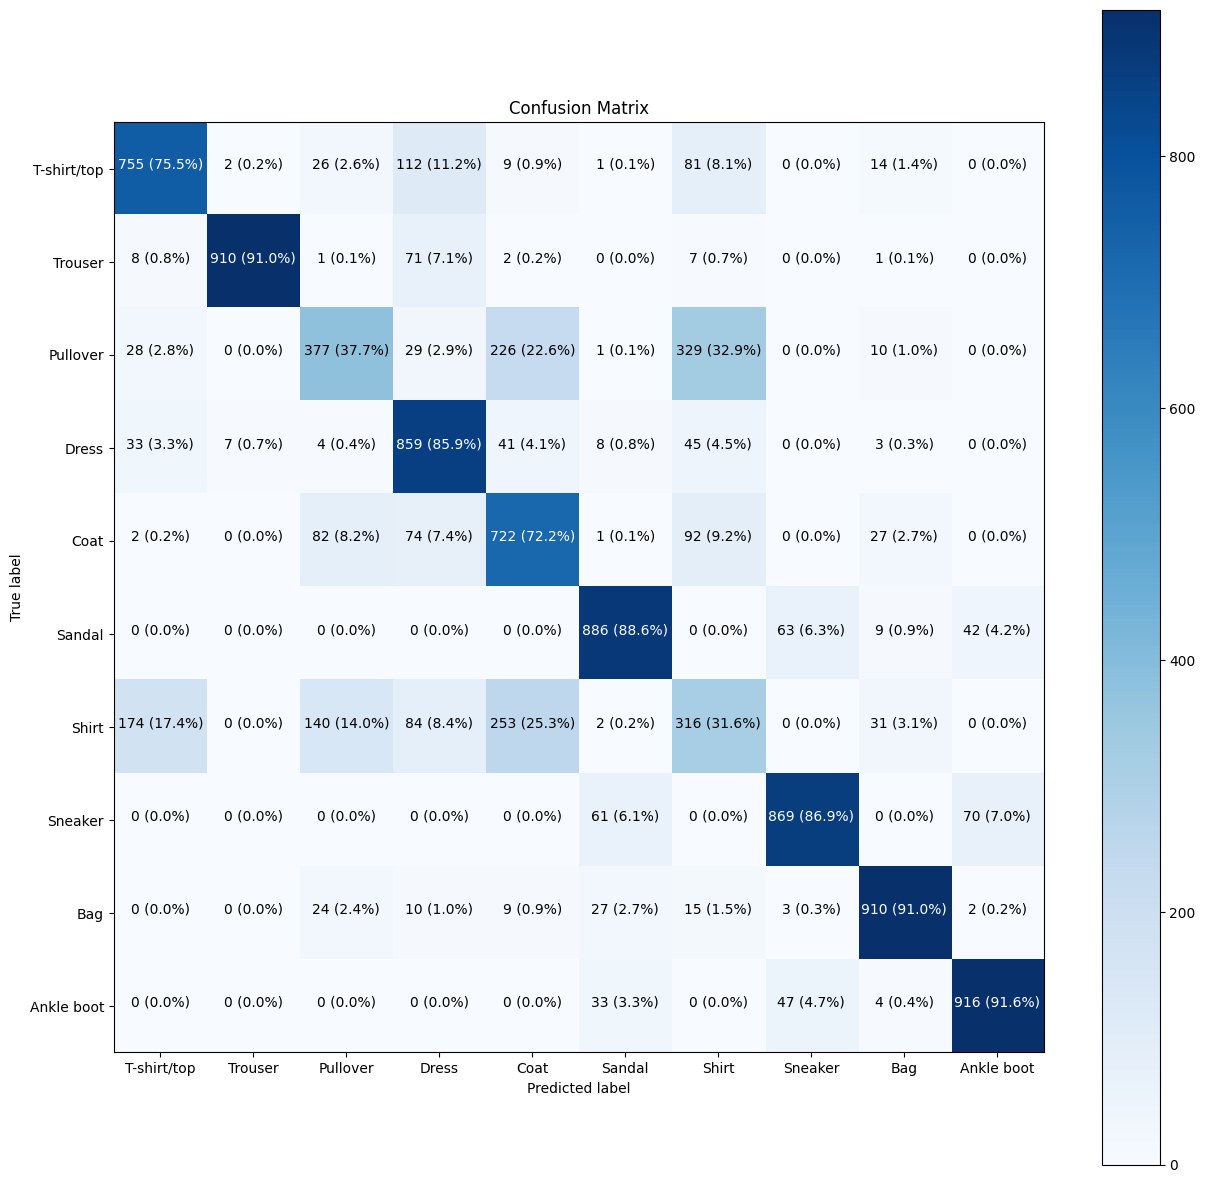

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
test_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_14.evaluate(test_data, test_labels)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.6806 - accuracy: 0.7520
Model loss on the test set: 0.6805537343025208
Model accuracy on the test set: 75.20%


In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]#index of the max probability is selected
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 29ms/step


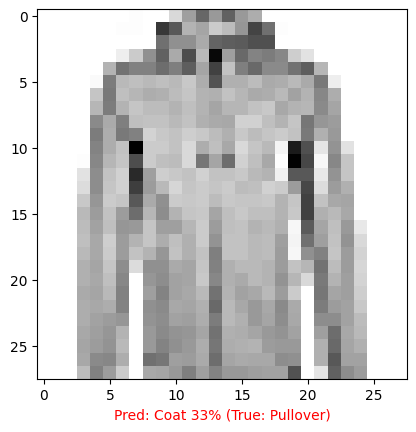

In [ ]:
# Chechk out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,#always make predictions on the same kind of daya your model is trained on
                  true_labels=test_labels,
                  classes=class_names)

#What  patterns is our model is learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extraction of particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.4923398 , -0.3573972 ,  0.44801426,  0.57205683],
        [-0.7351407 , -0.4097099 ,  0.69761646,  0.5574031 ],
        [-1.3469474 ,  1.4986409 ,  1.2737257 ,  1.5520049 ],
        ...,
        [ 0.57854986, -0.639587  ,  0.5148884 , -0.47695103],
        [-0.38511148, -0.9867917 ,  1.1720417 ,  0.59157693],
        [-0.8922466 ,  0.6381737 ,  0.34835562,  0.76516545]],
       dtype=float32),
 (784, 4))

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([0.35666865, 0.21298036, 0.22107936, 0.06823944], dtype=float32), (4,))

In [ ]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 4)                 3140      
                                                                 
 dense_57 (Dense)            (None, 4)                 20        
                                                                 
 dense_58 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


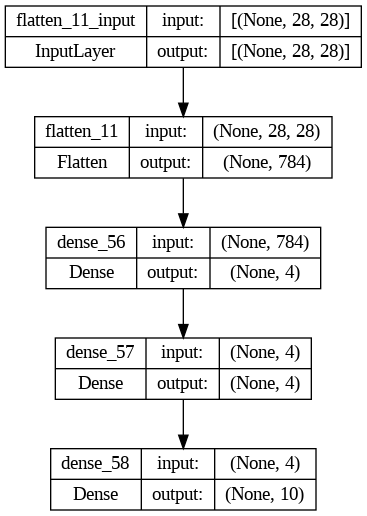

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)